In [1]:
import json
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Hypothèses:

 - Les nombres vont de 1 à 75
 - Lignes, colonnes et diagonales permettent de gagner
 - Les chances de gagner sont fonctions du nombre de carte en jeu et du nombre de tirage
 - Il faut minimum 4 tirage pour avoir un gagnant
 - La carte la plus remplie non gagnante est cochée 19 fois maximum (à 20 il y a d'office un bingo)
 - Il existe un joueur qui n'a rien coché après 30 tirages
 - 30 est un nombre élevé de tirage sans gagnant
 
 - Alice et Bob ont un Bingo ou un (Bingo -1) au 30 ème tirage (mais quel type de bingo, pourquoi écossais, généralement on tire 12 numéro au bingo classique)

$$ C(19, 75) = 2.868457137478833 \times 10^{17} $$
$$ C(30, 75) = 7.8187943062594297688 \times 10^{20}$$
$$ 75! = 2.4809140811395398 \times 10^{109}$$

### References

 - https://en.wikipedia.org/wiki/Bingo_(American_version)
 - https://www.playsmart.ca/charitable-centre-games/bingo/odds/
 - http://www.durangobill.com/BingoHowTo.html
 - https://wizardofodds.com/ask-the-wizard/bingo/
 - https://www.wolframalpha.com/input/?i=C%2875%2C+30%29

In [2]:
def spacer(l):
    return l[:12] + [0] + l[12:]

In [3]:
with open("SGRS2020_Task25_data.json") as fh:
    data = json.load(fh)

In [4]:
C = collections.Counter()
for k in data:
    C.update(data[k])

In [5]:
dist= pd.DataFrame([(k,v) for k,v in C.items()], columns=['number', 'count']).set_index('number').sort_index()

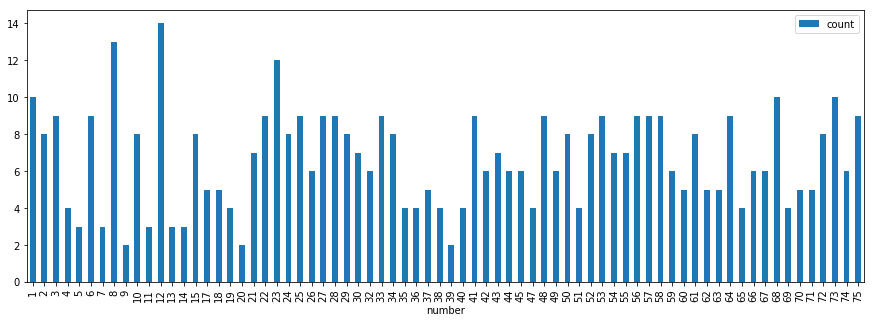

In [6]:
dist.plot(kind='bar', figsize=(15,5))

In [7]:
All = set(range(1, 76))
print(All)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}


In [8]:
All.difference(set(dist.index))

{16, 31, 46}

In [9]:
def matrix(l):
    return np.array(spacer(l)).reshape((5,5)).T

In [10]:
def marker(m, n, inplace=False):
    if not inplace:
        m = np.array(m)
    for i in n:
        c = np.where(m == i)
        if c[0].size > 0:
            m[c[0][0],c[1][0]] = 0
    return m

In [11]:
def check(m):
    for k in range(5):
        col = np.sum(m[:,k]<=0)
        row = np.sum(m[k,:]<=0)
        if (col == 5) or (row == 5):
            return True
    d1 = np.sum(np.array([m[k,k] for k in range(5)])<=0)
    d2 = np.sum(np.array([m[k,5-k-1] for k in range(5)])<=0)
    if (d1 == 5) or (d2 == 5):
            return True
    else:
        return False

In [12]:
A = matrix(data['Alice'])
A

array([[ 2, 19, 34, 47, 61],
       [ 3, 23, 37, 48, 64],
       [10, 24,  0, 53, 68],
       [12, 25, 41, 56, 72],
       [15, 30, 43, 57, 73]])

In [13]:
Am = marker(A, [1,2,3])
Ac = check(Am)
print(Am, Ac)

[[ 0 19 34 47 61]
 [ 0 23 37 48 64]
 [10 24  0 53 68]
 [12 25 41 56 72]
 [15 30 43 57 73]] False


In [14]:
Am = marker(A, [2,3,10,12,15])
Ac = check(Am)
print(Am, Ac)

[[ 0 19 34 47 61]
 [ 0 23 37 48 64]
 [ 0 24  0 53 68]
 [ 0 25 41 56 72]
 [ 0 30 43 57 73]] True


In [15]:
Am = marker(A, [3,23,37,48,64])
Ac = check(Am)
print(Am, Ac)

[[ 2 19 34 47 61]
 [ 0  0  0  0  0]
 [10 24  0 53 68]
 [12 25 41 56 72]
 [15 30 43 57 73]] True


In [16]:
Am = marker(A, [2,23,56,73])
Ac = check(Am)
print(Am, Ac)

[[ 0 19 34 47 61]
 [ 3  0 37 48 64]
 [10 24  0 53 68]
 [12 25 41  0 72]
 [15 30 43 57  0]] True


In [17]:
Am = marker(A, [15,25,48,61])
Ac = check(Am)
print(Am, Ac)

[[ 2 19 34 47  0]
 [ 3 23 37  0 64]
 [10 24  0 53 68]
 [12  0 41 56 72]
 [ 0 30 43 57 73]] True


In [18]:
def MonteCarlo(numbers, n=30, N=100, data=data):
    MC = collections.Counter()
    for i in range(N):
        setup = np.random.choice(list(numbers), size=n, replace=False)
        stats = dict()
        for k in data:
            stats[k] = check(marker(matrix(data[k]), setup))
        MC.update(stats)
    df = pd.DataFrame([(k,v) for k,v in MC.items()], columns=['player', 'count']).set_index('player')
    df['frequency'] = df['count'].astype(float)/float(N)
    return df

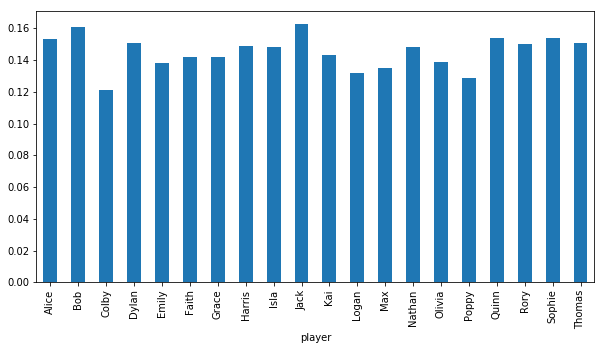

In [19]:
distY = MonteCarlo(All, N=1000)
distY['frequency'].plot(kind='bar', figsize=(10,5))

In [20]:
def gen():
    for k in data:
        for j in data:
            l = set(data[k]).intersection(data[j])
            yield (k, j, len(l), list(l))

In [21]:
inter = pd.DataFrame(gen(), columns=['player1', 'player2', 'count', 'intersection'])
inter.sample(5)

,player1,player2,count,intersection
341,Rory,Bob,7,"[33, 65, 67, 40, 48, 18, 21]"
56,Colby,Quinn,7,"[34, 10, 75, 47, 53, 23, 25]"
177,Isla,Rory,6,"[33, 65, 3, 48, 18, 21]"
391,Thomas,Logan,11,"[64, 34, 6, 8, 73, 74, 12, 45, 22, 55, 58]"
299,Olivia,Thomas,12,"[64, 1, 34, 6, 43, 12, 75, 51, 22, 23, 24, 58]"


In [22]:
crossinter = inter.pivot_table(index='player1', columns='player2', values='count')
crossinter

player2,Alice,Bob,Colby,Dylan,Emily,Faith,Grace,Harris,Isla,Jack,Kai,Logan,Max,Nathan,Olivia,Poppy,Quinn,Rory,Sophie,Thomas
player1,,,,,,,,,,,,,,,,,,,,
Alice,24,9,10,7,9,6,11,6,10,7,4,11,10,10,13,12,16,4,13,9
Bob,9,24,7,4,8,8,5,2,18,14,7,4,10,9,7,9,8,7,9,8
Colby,10,7,24,7,8,7,6,11,8,11,6,7,10,6,5,5,7,6,5,5
Dylan,7,4,7,24,12,6,12,14,5,8,10,14,11,10,12,10,7,6,7,13
Emily,9,8,8,12,24,3,9,9,10,6,6,12,11,10,12,11,13,4,9,13
Faith,6,8,7,6,3,24,6,8,9,8,10,9,7,5,6,2,3,10,7,1
Grace,11,5,6,12,9,6,24,8,5,7,5,10,12,12,13,10,10,7,13,9
Harris,6,2,11,14,9,8,8,24,3,8,9,13,8,7,5,5,4,8,6,10
Isla,10,18,8,5,10,9,5,3,24,12,6,5,11,9,7,9,9,6,9,10


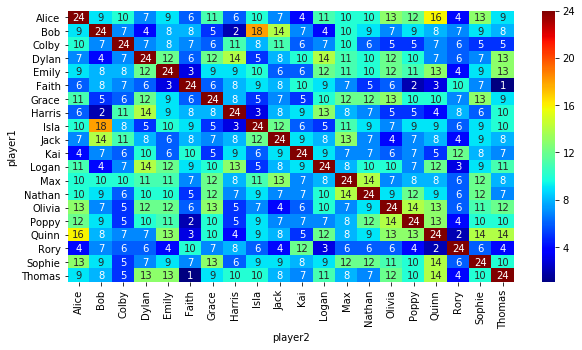

In [23]:
fig, axe = plt.subplots(figsize=(10,5))
sns.heatmap(crossinter, annot=True, ax=axe, cmap='jet')

In [24]:
inter.describe()

,count
count,400.000000
mean,9.215000
std,4.501047
min,1.000000
25%,6.000000
50%,9.000000
75%,11.000000
max,24.000000


In [25]:
inter.loc[inter['count']<24,:].describe()

,count
count,380.000000
mean,8.436842
std,3.030837
min,1.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,18.000000


In [26]:
a1 = set(data["Alice"]).difference(set(data["Quinn"]))
a1

{3, 19, 41, 48, 56, 57, 61, 68}

In [27]:
a2 = set(data["Alice"]).difference(set(data["Olivia"]))
a2

{10, 15, 19, 25, 37, 47, 48, 53, 56, 61, 73}

In [28]:
a3 = set(data["Bob"]).difference(set(data["Isla"]))
a3

{1, 6, 37, 39, 40, 67}

In [29]:
a4 = set(data["Bob"]).difference(set(data["Jack"]))
a4

{2, 12, 17, 21, 24, 40, 53, 65, 67, 68}

In [30]:
A = a1.union(a2, a3, a4)
print(A)

{1, 65, 3, 68, 67, 6, 2, 73, 10, 12, 15, 17, 19, 21, 24, 25, 37, 39, 40, 41, 47, 48, 53, 56, 57, 61}


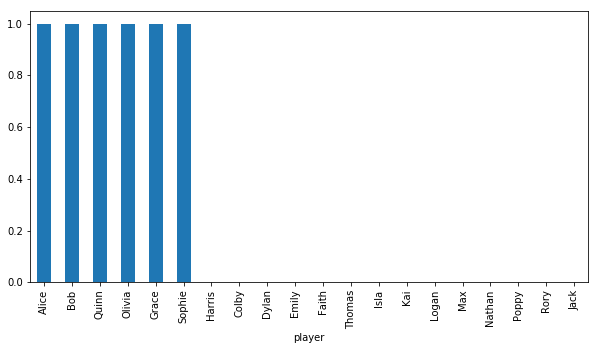

In [31]:
distZ = MonteCarlo(A, n=26, N=1000)
distZ['frequency'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [32]:
a5 = set(data["Quinn"]).intersection(set(data["Olivia"]))

In [33]:
A = All.difference(a5).difference(set(data["Bob"]).intersection(set(data["Isla"])))
len(A)

48

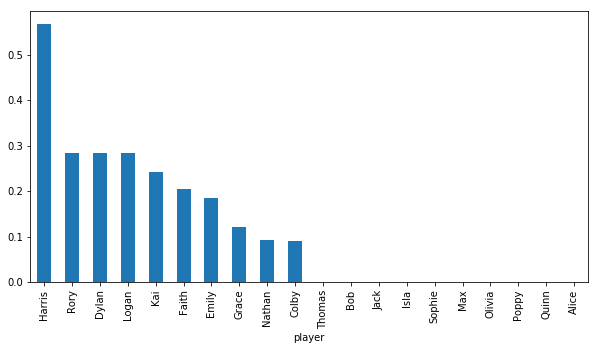

In [34]:
distZ = MonteCarlo(A, n=30, N=1000)
distZ['frequency'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [35]:
dep = pd.read_excel('SGRS2020_Task25_depprob_N100000.xlsx', index_col=0)
dep

FileNotFoundError: [Errno 2] No such file or directory: 'SGRS2020_Task25_depprob_N100000.xlsx'

In [ ]:
crossdep = dep.pivot_table(index='without', columns='player', values='frequency')
crossdep

In [ ]:
fig, axe = plt.subplots(figsize=(15,10))
sns.heatmap(crossdep, annot=True, ax=axe, vmin=0, vmax=0.6, cmap='jet')

In [ ]:
dep.describe()

In [ ]:
Gm = (crossdep.values == 0).astype(int)
Gm

In [ ]:
import networkx as nx

In [ ]:
G = nx.from_numpy_matrix(Gm, create_using=nx.DiGraph)

In [ ]:
G = nx.relabel.relabel_nodes(G, {i:k for i, k in enumerate(crossdep.index)} )

In [ ]:
posa = nx.circular_layout(G)

In [ ]:
fig, axe = plt.subplots(figsize=(10, 6))
nx.draw_networkx(G, posa, ax=axe)

In [ ]:
posb = nx.spring_layout(G, seed=10)

In [ ]:
fig, axe = plt.subplots(figsize=(10, 6))
nx.draw_networkx(G, posb, ax=axe)

In [ ]:
crossdep.values

In [ ]:
A = matrix(data["Alice"])
B = matrix(data["Bob"])

In [ ]:
def gen_combo(m):
    for k in range(5):
        yield m[:,k]
    for k in range(5):
        yield m[k,:]
    yield np.diag(m)
    yield np.array(list(reversed(np.diag(np.fliplr(m)))))

In [ ]:
A

In [ ]:
list(gen_combo(A))

In [ ]:
B

In [ ]:
list(gen_combo(B))

In [ ]:
def banned_combo(m, n=0, data=data):
    for a in gen_combo(m):
        print(a)
        a = set(a)
        for k in data:
            Q = set(data[k]).intersection(a)
            if len(Q) == n:
                print(k)

In [ ]:
banned_combo(A)

In [ ]:
banned_combo(B)

In [ ]:
banned_combo(B, n=5)

In [ ]:
import itertools

In [ ]:
for p in itertools.combinations(data, 2):
    L = matrix(data[p[0]])
    R = matrix(data[p[1]])
    for (l, r) in zip(gen_combo(L), gen_combo(R)):
        if all(l == r):
            print(p)
            print(l, r)